In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from StringIO import StringIO # required by pd.read_csv. It expects an object with a .read() method.
from datetime import datetime, timedelta 
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("./datasets/task2/mesa_345_task2.csv.gz") # Need to generate file first in case it is not available.
df = df[df["interval"] != "EXCLUDED"]

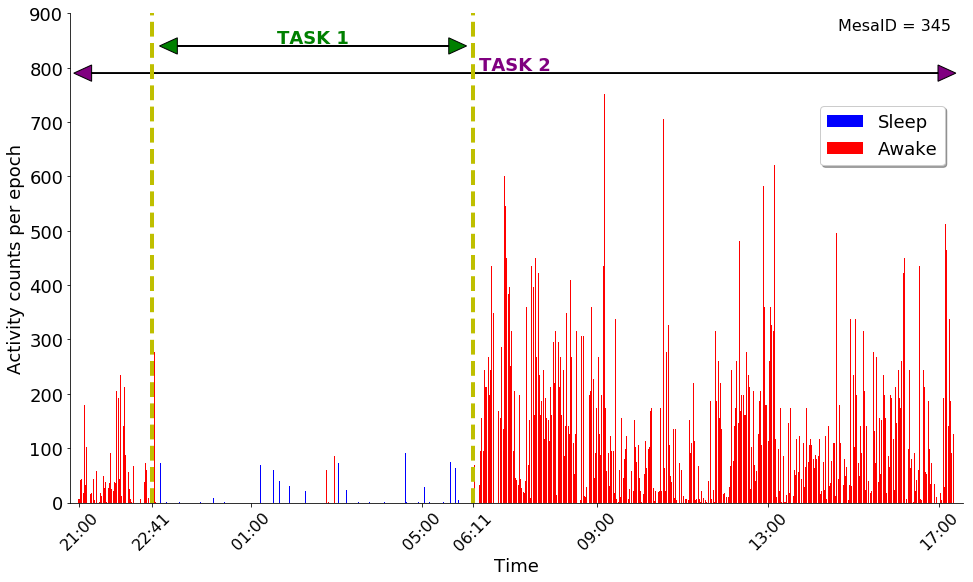

In [4]:
dfsleep = df[df["gt"] == 1]
dfawake = df[df["gt"] == 0]

everyX = 1

#.astype(str).apply(lambda x: x.split()[1])
y_sleep = dfsleep["activity"].values[::everyX]
x_sleep = dfsleep.index[::everyX]
#
y_awake = dfawake["activity"].values[::everyX]
x_awake = dfawake.index[::everyX]

plt.figure(figsize=(16, 9))

ax = plt.subplot(111)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(True)

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    

dotsize = 9
#p1 = plt.scatter(x_sleep, y_sleep, s=dotsize, c='blue', marker='s', label='Sleep')
#p2 = plt.scatter(x_awake, y_awake, s=dotsize, c='red', marker='o', label='Awake')

p1 = plt.bar(x_sleep, y_sleep, color='blue', label='Sleep')
p2 = plt.bar(x_awake, y_awake, color='red', label='Awake')

#df[df["stage"] > 0] # -> PSG starts 22:41 , row 628
# [df["stage"] > 0].tail(1) # -> PSG stoped 06:11:00, row 1528
plt.axvline(x=628, color='y', linestyle='--', linewidth=4)
plt.axvline(x=1528, color='y', linestyle='--', linewidth=4)

plt.ylim((0, 900)) 
plt.xlim((400, 2900)) 

plt.xlabel("Time", fontsize=18)
plt.ylabel("Activity counts per epoch", fontsize=18)

# Every 3 hours
#plt.xticks(df.index[5::360], df.linetime[5::360], fontsize=14, rotation=45)  
#plt.xticks(df.index[5::360], ["21:00", "00:00", "03:00", "06:00", "09:00", "12:00", "15:00", ], fontsize=14, rotation=45)  
#plt.xticks([426, 628, 786, 1146, 1506, 1528, 1874, 2234, 2594], ["21:00", "22:41", "00:00", "03:00", "06:00", "06:11", "09:00", "12:00", "15:00"], fontsize=14, rotation=45)  

# Every 4 hours
#plt.xticks(df.index[5::480], df.linetime[5::480], fontsize=14, rotation=45)  
plt.xticks([426, 628, 906, 1386, 1528, 1874, 2354, 2834], ["21:00", "22:41", "01:00", "05:00", "06:11", "09:00", "13:00", "17:00"], fontsize=16, rotation=45)  
plt.yticks(fontsize=18)

#plt.arrow(628, 1528, 70, 50, head_width=500, head_length=100, fc='k', ec='k')

#ax.annotate('double-headed arrow', xy=(700,50), xytext=(1080,50), arrowprops={'arrowstyle': '<|-|>'}, va='center')

head_width = 30
head_length = 50
distance_from_arrow = 5
x_negative_shift = 100

arrowsize1 = 760
startarrowx1 = 700
startarrowy1 = 840
color1 = "g"
ax.arrow(startarrowx1, startarrowy1, arrowsize1, 0, head_width=head_width, head_length=head_length, fc=color1, ec='k')
ax.arrow(startarrowx1 + arrowsize1, startarrowy1, -arrowsize1, 0, head_width=head_width, head_length=head_length, fc=color1, ec='k')


arrowsize2 = 2370
startarrowx2 = 460
startarrowy2 = 790
color2 = "purple"
ax.arrow(startarrowx2, startarrowy2, arrowsize2, 0, head_width=head_width, head_length=head_length, fc=color2, ec='k')
ax.arrow(startarrowx2 + arrowsize2, startarrowy2, -arrowsize2, 0, head_width=head_width, head_length=head_length, fc=color2, ec='k')

ax.text(startarrowx1 + arrowsize1/2 - x_negative_shift, startarrowy1 + distance_from_arrow, "TASK 1", fontsize=18, color=color1, fontweight='bold')
ax.text(startarrowx2 + arrowsize2/2 - x_negative_shift, startarrowy2 + distance_from_arrow, "TASK 2", fontsize=18, color=color2, fontweight='bold')

ax.text(2550, 870, "MesaID = 345", fontsize=16, color="k")

#plt.legend((p1[0], p2[0]), ("a", "b"), 'upper left')
#plt.legend(handles=[line_up, line_down])

#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fancybox=True, shadow=True, fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(0.83, 0.75), fancybox=True, shadow=True, fontsize=18)